In [3]:
#import the libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
original_image = cv2.imread('dataset/images/tile_36.jpg')

(994, 663, 3)


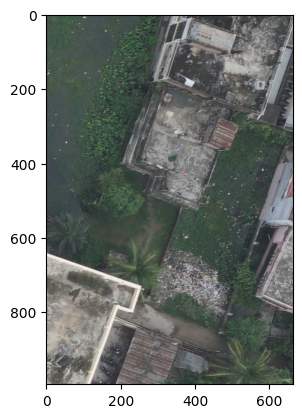

In [5]:
# Visualize the image
rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
print(rgb_image.shape)

In [6]:
#reshape the input image into 2D array size.
pixel_value = rgb_image.reshape((-1,3))
#Convert to float32 datatype
pixel_value = np.float32(pixel_value)

In [7]:
# let's define stopping criteria
stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

[717020800.0]
[717020800.0, 398489056.0]
[717020800.0, 398489056.0, 275246912.0]
[717020800.0, 398489056.0, 275246912.0, 193693424.0]
[717020800.0, 398489056.0, 275246912.0, 193693424.0, 147718112.0]
[717020800.0, 398489056.0, 275246912.0, 193693424.0, 147718112.0, 118103936.0]
[717020800.0, 398489056.0, 275246912.0, 193693424.0, 147718112.0, 118103936.0, 98704864.0]
[717020800.0, 398489056.0, 275246912.0, 193693424.0, 147718112.0, 118103936.0, 98704864.0, 83896264.0]
[717020800.0, 398489056.0, 275246912.0, 193693424.0, 147718112.0, 118103936.0, 98704864.0, 83896264.0, 73980336.0]


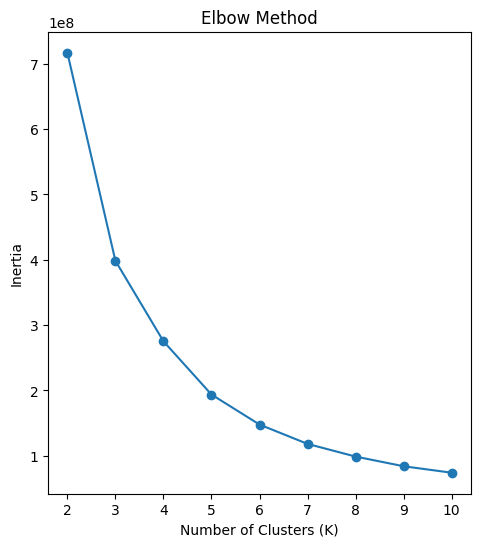

In [8]:
# Define a range of K values to try
k_values = range(2, 11)  # You can adjust the range as needed

# Initialize lists to store the results
inertia_values = []
silhouette_scores = []

# Iterate over different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixel_value)

    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    print(inertia_values)

    # Silhouette score
    # labels = kmeans.labels_
    # silhouette_avg = silhouette_score(pixel_value, labels)
    # silhouette_scores.append(silhouette_avg)

# Plot the elbow method to find the optimal K
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
# plt.subplot(1, 2, 2)
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score')

# plt.tight_layout()
plt.show()


In [9]:
# let's specify number of clusters (K)
k = 5
attempts = 10
ret, labels, centers = cv2.kmeans(pixel_value, k, None, stop_criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [11]:
# v = np.array([[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[192,192,192]])
v = np.array([[255,0,0],[0,255,0],[0,0,255],[255,255,0],[255,0,255]])
v

array([[255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255,   0],
       [255,   0, 255]])

In [12]:
# convert back into uint8 to make original input image
centers = np.uint8(centers)

# converting all pixels to the color of the centroids
# segmented_image = centers[labels.flatten()]
segmented_image = v[labels.flatten()]

In [13]:
# Reshape to the original image dimension
segmented_image = segmented_image.reshape(rgb_image.shape)
print(segmented_image.shape)

(994, 663, 3)


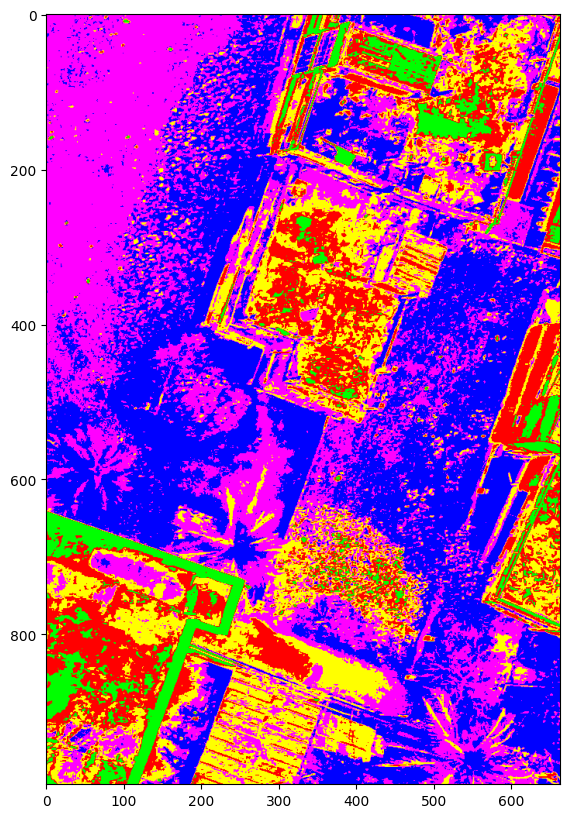

In [14]:
# show the segmented output image
plt.figure(figsize=(10,10))
plt.imshow(segmented_image)
plt.show()